## 1. 선형회귀(linear regression)를 이용하여 와인의 품질에 영향을 끼치는 요인에 대해서 알아보고자 한다. 
### 다음은 사용하는 데이터에 포함된 변수들이다.
#### 설명변수
1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

#### 종속변수
12 - quality (0~10)

In [2]:
# packages and data import
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
data=pd.read_csv('https://drive.google.com/uc?export=download&id=1Bs6z1GSoPo2ZPr5jL2qDjRghYcMUOHbS')

In [3]:
# (1) 종속변수(y)와의 상관 계수를 계산해서 표를 채우고 상관관계가 큰 변수 5개를 찾으시오. 

reg = LinearRegression()
reg.fit(data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']], data['quality'])
coef = sorted(list(reg.coef_), reverse=True)
coef

[0.9163344127211306,
 0.2761976992268885,
 0.024990552671672973,
 0.016331269765473756,
 0.004361333309097215,
 -0.003264579703068371,
 -0.1825639484107119,
 -0.4136531438217591,
 -1.0835902586934332,
 -1.8742251580991987,
 -17.881163832495698]

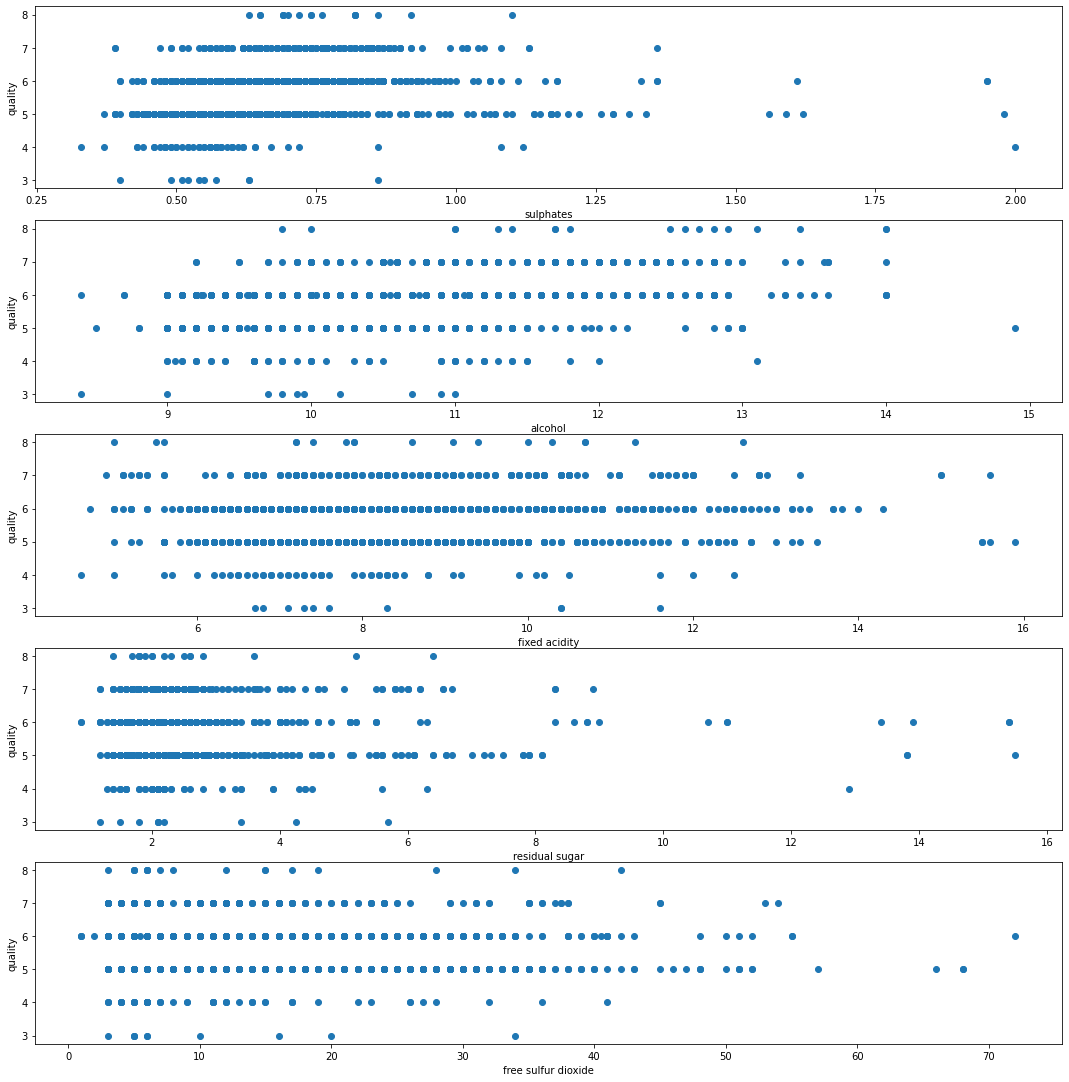

In [4]:
# (2) (1)에서 찾은 변수들에 대해서 종속변수와의 산포도를 각각 그리시오. 이 때 각 축의 변수명이 표시되도록 하시오.

variable = ['sulphates', 'alcohol', 'fixed acidity', 'residual sugar', 'free sulfur dioxide']
x = 0
fig, axs = plt.subplots(5,1,figsize=(15,15))
fig.tight_layout()
for i in range(len(variable)):
    axs[x].scatter(data[variable[i]], data['quality'])
    axs[x].set_xlabel(variable[i])
    axs[x].set_ylabel('quality')
    x += 1

In [5]:
# (3) 설명변수들의 VIF 값을 구하시오. 

variable = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

n = len(data)
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].values
p = X.shape[1]

for i in range(len(variable)):
    reg.fit(data[variable[:i]+variable[i+1:]], data[variable[i]])
    r2 = reg.score(data[variable[:i]+variable[i+1:]], data[variable[i]])
    vif = 1/(1-r2)
    print(f'Variable: {variable[i]} VIF: {vif}')

Variable: fixed acidity VIF: 7.7675115657076566
Variable: volatile acidity VIF: 1.7893896822287905
Variable: citric acid VIF: 3.128022124356086
Variable: residual sugar VIF: 1.7025879081509203
Variable: chlorides VIF: 1.481932329802809
Variable: free sulfur dioxide VIF: 1.9630191414810896
Variable: total sulfur dioxide VIF: 2.186812788590086
Variable: density VIF: 6.343760185861592
Variable: pH VIF: 3.3297316235827044
Variable: sulphates VIF: 1.429433749389569
Variable: alcohol VIF: 3.031159819884125


In [6]:
# (5) 전체 설명변수를 모두 이용해서 선형회귀 모델 M1을 학습하고 그 결과를 바탕으로 아래 표를 채우시오. 

print('===================== beta ====================')

# 추정계수 beta
n = len(data)
variable_1 = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
X1 = data[variable_1].values
p1 = X1.shape[1]

X1 = np.c_[np.ones(n), X1]
X1tX1 = np.matmul(X1.T, X1)
inv_X1tX1 = np.linalg.inv(X1tX1)
betas1 = np.matmul(np.matmul(inv_X1tX1, X1.T), data[['quality']].values)

for beta in betas1:
    print(beta[0])

reg1 = LinearRegression()
reg1.fit(data[variable_1], data['quality'])
print(reg1.intercept_) # beta0랑 같다

print('===================== se(beta) ====================')


# se(b)
y_pred1 = np.matmul(X1, betas1)
y_pred1 = y_pred1.flatten()
SSE1 = np.sum((data['quality'].values - y_pred1)**2)
MSE1 = SSE1/(n-p-1)

cov_beta = MSE1*inv_X1tX1
np.diag(cov_beta)
se_betas = np.sqrt(np.diag(cov_beta))

for se_beta in se_betas:
    print(se_beta)



===================== beta ====================
21.965208443000108
0.02499055266685312
-1.0835902586891926
-0.18256394839582013
0.016331269763631674
-1.8742251583371652
0.004361333309222086
-0.003264579703090237
-17.881163826168468
-0.41365314386349405
0.9163344127118787
0.2761976992337283
21.965208449448262
===================== se(beta) ====================
21.194574993673672
0.025948501758756685
0.12110127953566324
0.14717618789695605
0.01500209629187748
0.4192832051018389
0.002171291816155928
0.0007287285052803269
21.63309987577107
0.191597360769909
0.11433746536895582
0.026483586181034892


In [7]:
print('===================== t ====================')

# t
for i in range(len(betas1)):
    t = betas1[i][0]/se_betas[i]
    print(t)


print('===================== P>|t| ====================')

# P > |t|
for i in range(len(betas1)):
    t = betas1[i][0]/se_betas[i]
    p_t = 2*(1-stats.t.cdf(np.abs(t), n-p-1))
    print(p_t)

===================== t ====================
1.0363599387841682
0.9630826819671663
-8.947801896429054
-1.2404448776974741
1.0885991828004626
-4.470069717869902
2.0086352634734395
-4.479829839830981
-0.8265650289996236
-2.158970991047491
8.014297061378413
10.42901430892753
===================== P>|t| ====================
0.30019213591063965
0.335652752318063
0.0
0.21499424610765927
0.2764959611581963
8.373953361395792e-06
0.04474495076708962
8.004609817202635e-06
0.4086078972878773
0.03100188616787225
1.9984014443252818e-15
0.0


In [8]:
# (6) (4)의 방안을 바탕으로 다중공선성이 문제가 없는 모델(M2)을 학습하고 그 결과를 바탕으로 (5)와 동일한 표를 작성하시오. 

print('===================== beta ====================')

# 추정계수 beta
n = len(data)
variable_2 = ['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']
X2 = data[variable_2].values
p2 = X2.shape[1]

X2 = np.c_[np.ones(n), X2]
X2tX2 = np.matmul(X2.T, X2)
inv_X2tX2 = np.linalg.inv(X2tX2)
betas2 = np.matmul(np.matmul(inv_X2tX2, X2.T), data[['quality']].values)

for beta in betas2:
    print(beta[0])
betas2 = betas2

reg2 = LinearRegression()
reg2.fit(data[variable_2], data['quality'])
print(reg2.intercept_)

print('===================== se(beta) ====================')


# se(b)
y_pred = np.matmul(X2, betas2)
y_pred = y_pred.flatten()
SSE = np.sum((data['quality'].values - y_pred)**2)
MSE = SSE/(n-p-1)

cov_beta = MSE*inv_X2tX2
np.diag(cov_beta)
se_betas = np.sqrt(np.diag(cov_beta))

for se_beta in se_betas:
    print(se_beta)



===================== beta ====================
4.658317519786084
-1.0815016852460708
-0.14260588339199476
0.009399835606029843
-1.961589193714812
0.004591212404383926
-0.003413437723783655
-0.5465105498891075
0.896899774706152
0.291652595172525
4.658317519786813
===================== se(beta) ====================
0.4613570325013582
0.11646169072563478
0.12300377806081035
0.012026382359945112
0.4032942464869416
0.0021587194443710945
0.0006986063846892604
0.13327789447869906
0.11051698780124183
0.017212472507447115


In [9]:
print('===================== t ====================')

# t
for i in range(len(betas2)):
    t = betas2[i][0]/se_betas[i]
    print(t)


print('===================== P>|t| ====================')

# P > |t|
for i in range(len(betas2)):
    t = betas2[i][0]/se_betas[i]
    p_t = 2*(1-stats.t.cdf(np.abs(t), n-p2-1))
    print(p_t)



===================== t ====================
10.096990381895544
-9.286329938261987
-1.159361815061433
0.7816012600212009
-4.863915641748008
2.126822184492574
-4.88606717400951
-4.100534091018768
8.115492401215027
16.944259172895652
===================== P>|t| ====================
0.0
0.0
0.2464829192828326
0.4345653851302895
1.2648752139021724e-06
0.03358856165914337
1.1324904332088437e-06
4.330402439012282e-05
8.881784197001252e-16
0.0


In [10]:
# (7) M2 모델을 기준으로 설명변수 중에서 종속변수를 예측하는데 통계적으로 유의하지 않은 변수(유의수준 0.05)를 제거한 뒤, 
# 새로운 모델(M3)를 학습하고 그 결과를 바탕으로 (5)와 동일한 표를 작성하시오. 

alpha = 0.025
print(f'alpha_point = {stats.t.ppf(1-alpha/2, n-p-1)}')

print('===================== beta ====================')

# 추정계수 beta
variable_3 = ['volatile acidity', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']
n = len(data)
X3 = data[variable_3].values
p3 = X3.shape[1]

X3 = np.c_[np.ones(n), X3]
X3tX3 = np.matmul(X3.T, X3)
inv_X3tX3 = np.linalg.inv(X3tX3)
betas3 = np.matmul(np.matmul(inv_X3tX3, X3.T), data[['quality']].values)

for beta in betas3:
    print(beta[0])
betas3 = betas3

reg3 = LinearRegression()
reg3.fit(data[variable_3], data['quality'])
print(reg3.intercept_)

print('===================== se(beta) ====================')


# se(b)
y_pred = np.matmul(X3, betas3)
y_pred = y_pred.flatten()
SSE = np.sum((data['quality'].values - y_pred)**2)
MSE = SSE/(n-p3-1)

cov_beta = MSE*inv_X3tX3
np.diag(cov_beta)
se_betas = np.sqrt(np.diag(cov_beta))

for se_beta in se_betas:
    print(se_beta)

alpha_point = 2.2435316338566222
===================== beta ====================
4.430098698408616
-1.0127527000153587
-2.017813816640165
0.005077369515559002
-0.0034822452876703217
-0.4826614440951055
0.882665132697465
0.2893027529423076
4.430098698408138
===================== se(beta) ====================
0.40291681405830676
0.10084294300358558
0.3975417351470759
0.0021255302488507985
0.0006867824923617937
0.11755805135945722
0.10990844700232724
0.016795788420133496


In [11]:
print('===================== t ====================')

# t
for i in range(len(betas3)):
    t = betas3[i][0]/se_betas[i]
    print(t)


print('===================== P>|t| ====================')

# P > |t|
for i in range(len(betas3)):
    t = betas3[i][0]/se_betas[i]
    p_t = 2*(1-stats.t.cdf(np.abs(t), n-p-1))
    print(p_t)

===================== t ====================
10.99507030691335
-10.042871319010882
-5.0757282525157965
2.3887542971002937
-5.070375739624841
-4.105728518919318
8.030912607461145
17.22472001347158
===================== P>|t| ====================
0.0
0.0
4.3149119677288184e-07
0.017021850484850276
4.436057554624284e-07
4.2354871229832725e-05
1.9984014443252818e-15
0.0


In [12]:
# (9) M1, M2, M3에 대해서 F-test를 수행하고 그 결과의 의미를 설명하시오. 또한 다음 표를 채우시오. 

# M1
p1 = 11

y_pred1 = np.matmul(X1, betas1)
y_pred1 = y_pred1.flatten()

SSE1 = np.sum((data['quality'].values - y_pred1)**2)
SSR1 = np.sum((y_pred1-np.mean(data['quality'].values))**2)
SST1 = np.sum((data['quality'].values - np.mean(data['quality'].values))**2)

MSE1 = SSE1/(n-p1-1)
MSR1 = SSR1/(p1)

F1 = MSR1/MSE1
p_value1 = 2*(1-stats.f.cdf(F1, n-p1-1, p1))

print('==================== M1 ======================')
print(f'SSE1: {SSE1}\nSSR1: {SSR1}\nSST1: {SST1}\nMSE1: {MSE1}\nMSR1: {MSR1}\nF1: {F1}\np-value: {p_value1}')


==================== M1 ======================
SSE1: 666.4107003870313
SSR1: 375.7544028080245
SST1: 1042.1651031894935
MSE1: 0.4199185257637248
MSR1: 34.15949116436587
F1: 81.34790219659506
p-value: 2.4471455972729927e-09


In [13]:
# M2
p2 = 7

y_pred2 = np.matmul(X2, betas2)
y_pred2 = y_pred2.flatten()

SSE2 = np.sum((data['quality'].values - y_pred2)**2)
SSR2 = np.sum((y_pred2-np.mean(data['quality'].values))**2)
SST2 = np.sum((data['quality'].values - np.mean(data['quality'].values))**2)

MSE2 = SSE2/(n-p2-1)
MSR2 = SSR2/(p2)

F2 = MSR2/MSE2
p_value2 = 2*(1-stats.f.cdf(F2, n-p2-1, p2))

print('==================== M1 ======================')
print(f'SSE2: {SSE2}\nSSR2: {SSR2}\nSST2: {SST2}\nMSE2: {MSE2}\nMSR2: {MSR2}\nF2: {F2}\np-value2: {p_value2}')


==================== M1 ======================
SSE2: 666.8055752514133
SSR2: 375.35952793795497
SST2: 1042.1651031894935
MSE2: 0.41911098381609885
MSR2: 53.622789705422136
F2: 127.94412882519731
p-value2: 5.730102925483038e-07


In [14]:
# M3
p3 = 7

y_pred3 = np.matmul(X3, betas3)
y_pred3 = y_pred3.flatten()

SSE3 = np.sum((data['quality'].values - y_pred3)**2)
SSR3 = np.sum((y_pred2-np.mean(data['quality'].values))**2)
SST3 = np.sum((data['quality'].values - np.mean(data['quality'].values))**2)

MSE3 = SSE3/(n-p3-1)
MSR3 = SSR3/(p3)

F3 = MSR3/MSE3
p_value3 = 2*(1-stats.f.cdf(F3, n-p3-1, p3))

print('==================== M1 ======================')
print(f'SSE3: {SSE3}\nSSR3: {SSR3}\nSST3: {SST3}\nMSE3: {MSE3}\nMSR3: {MSR3}\nF3: {F3}\np-value3: {p_value3}')


==================== M1 ======================
SSE3: 667.5370590557762
SSR3: 375.35952793795497
SST3: 1042.1651031894935
MSE3: 0.4195707473637814
MSR3: 53.622789705422136
F3: 127.80392828227713
p-value3: 5.751999090364279e-07


In [15]:
# (10) M1, M2, M3의 R^2와 adjusted R^2 값을 구하시오. M1, M2, M3의 결과를 비교하시오.

# reg1의 p = 11
# reg2의 p = 9
# reg3의 p = 7

r21 = reg1.score(data[variable_1], data['quality'])
r22 = reg2.score(data[variable_2], data['quality'])
r23 = reg3.score(data[variable_3], data['quality'])

adj_r21 = 1-(1-reg1.score(data[variable_1], data['quality']))*(n-1)/(n-11-1)
adj_r22 = 1-(1-reg2.score(data[variable_2], data['quality']))*(n-1)/(n-9-1)
adj_r23 = 1-(1-reg3.score(data[variable_3], data['quality']))*(n-1)/(n-7-1)

print(f'r21 = {r21} \nr22 = {r22} \nr23 = {r23}')
print(f'adg_r21 = {adj_r21} \nadg_r22 = {adj_r22} \nadg_r23 = {adj_r23}')

r21 = 0.3605517030386881 
r22 = 0.36017280447149036 
r23 = 0.35947091587233837
adg_r21 = 0.3561194842191705 
adg_r22 = 0.35654886189140444 
adg_r23 = 0.356652748940287


1599 1599


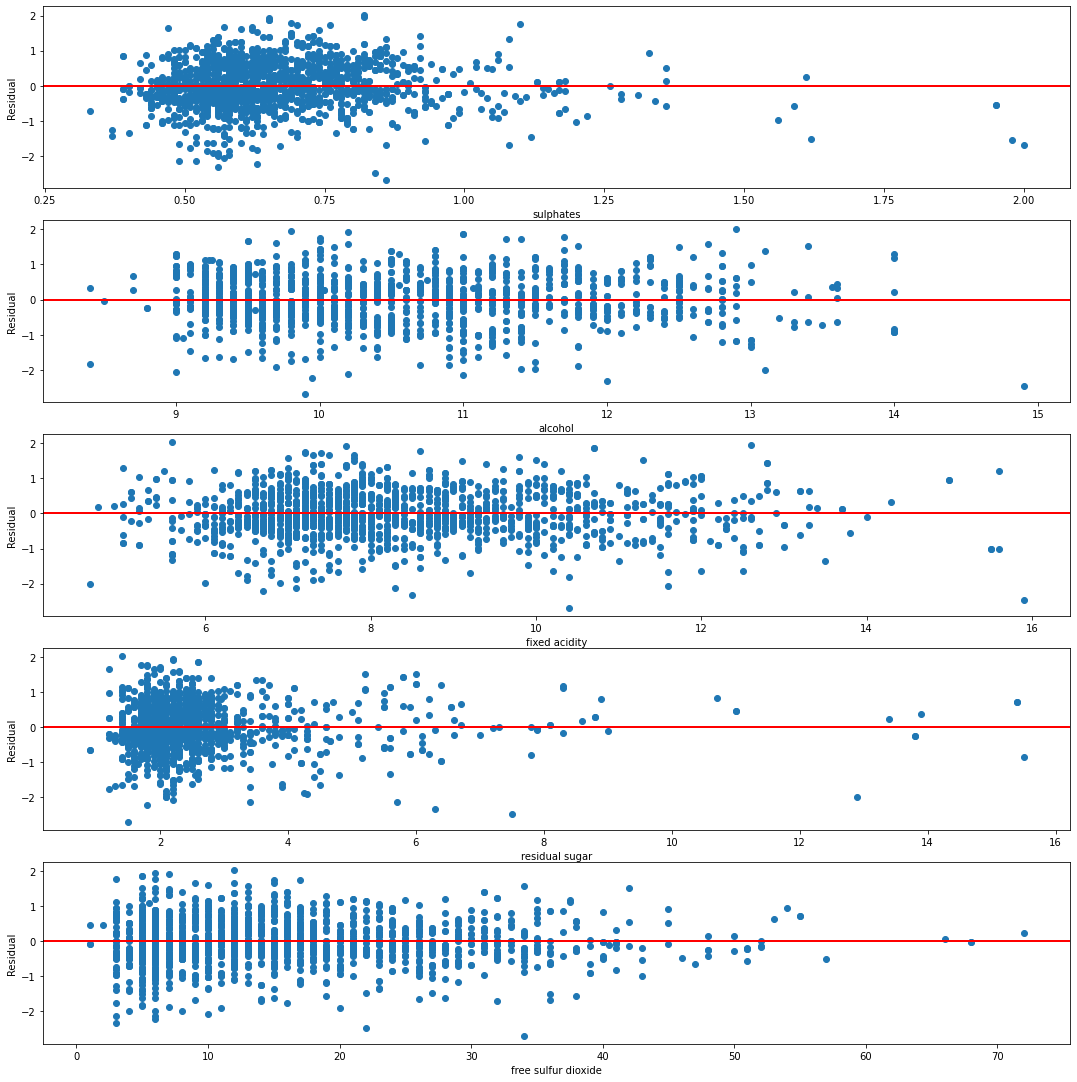

In [19]:
# (11) M1 모델을 기준으로 (1)에서 선택된 변수들에 대해서만, 개별 설명변수를 x축으로 하고 y축을 잔차(residual)로 하는 산포도(scatter plot)을 그리시오. 
# 산포도를 보고 알 수 있는 사항에 대해서 기술하시오. 

variable = ['sulphates', 'alcohol', 'fixed acidity', 'residual sugar', 'free sulfur dioxide']
y = data['quality'].values
residual = []
x=0

for j in range(len(y)):
    residual.append(y[j]-y_pred1[j])

fig, axs = plt.subplots(5,1,figsize=(15,15))
fig.tight_layout()
for i in range(len(variable)):
    axs[x].scatter(data[variable[i]], residual)
    axs[x].set_xlabel(variable[i])
    axs[x].set_ylabel('Residual')
    axs[x].axhline(y=0, color='r', linewidth=2)

    x += 1

print(data['sulphates'].size, data['quality'].size)

In [24]:
print(len(variable_1))

11


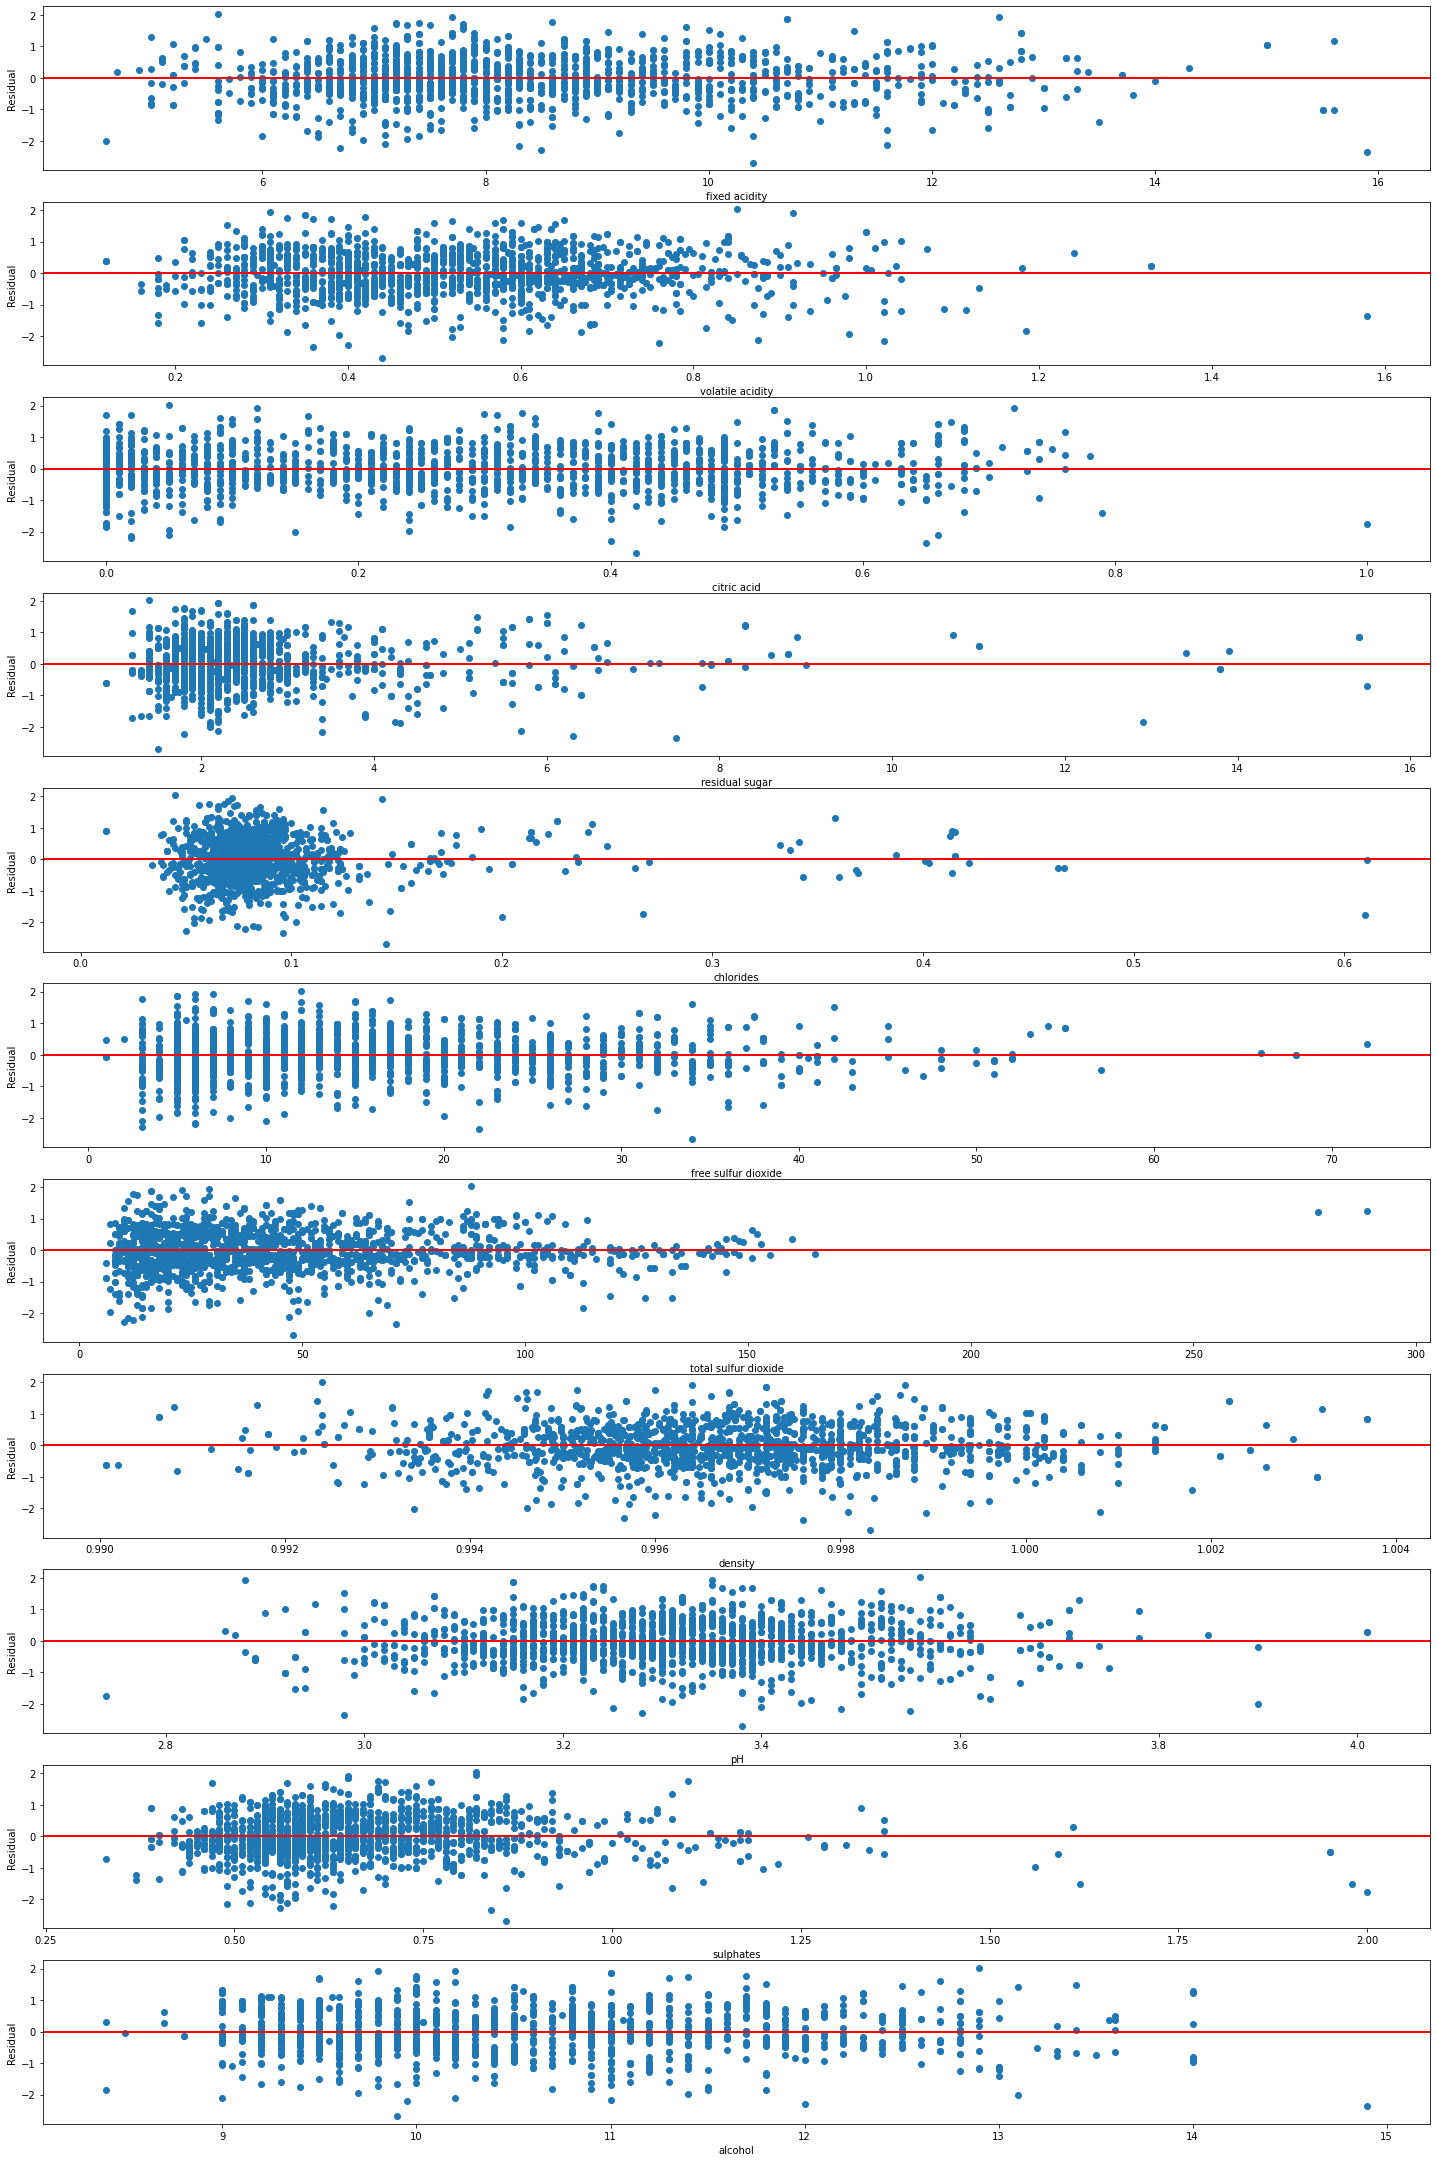

In [27]:
# (12) M1, M2, M3 모델의 잔차는 정규분포를 따른다고 볼 수 있는지 각각 기술하시오. 

# M1
variable_1 = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
y = data['quality'].values
residual1 = []
x=0

for j in range(len(y)):
    residual1.append(y[j]-y_pred[j])

fig, axs = plt.subplots(11,1,figsize=(20,30))
fig.tight_layout()
for i in range(len(variable_1)):
    axs[x].scatter(data[variable_1[i]], residual1)
    axs[x].set_xlabel(variable_1[i])
    axs[x].set_ylabel('Residual')
    axs[x].axhline(y=0, color='r', linewidth=2)
    x += 1

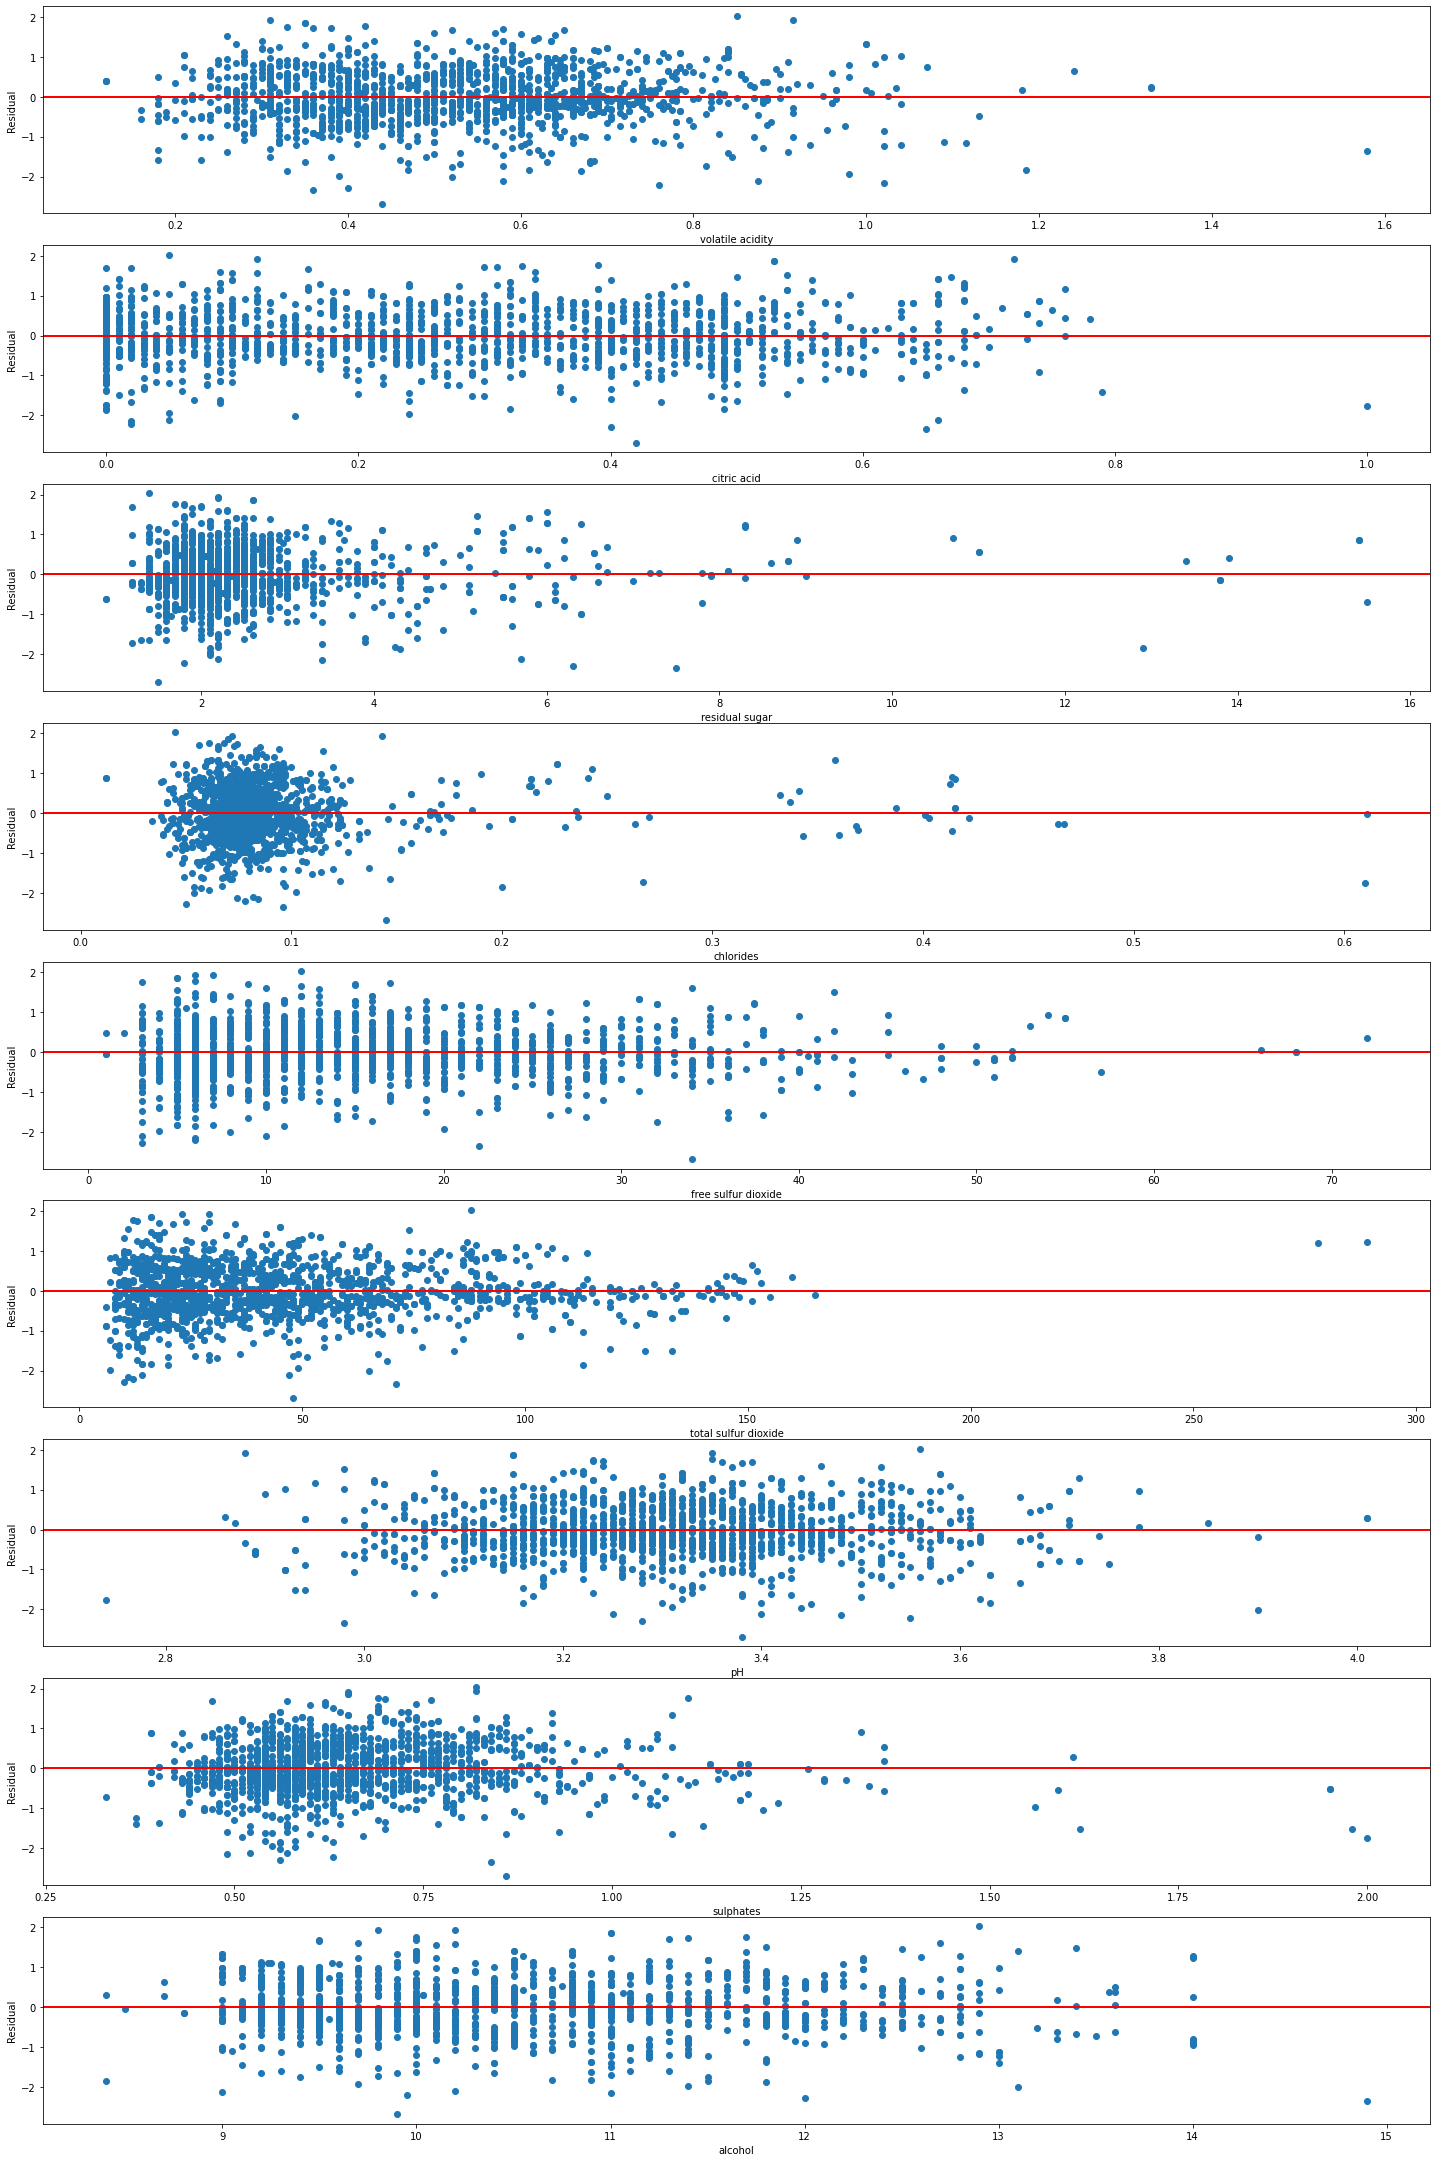

In [28]:
# (12) M1, M2, M3 모델의 잔차는 정규분포를 따른다고 볼 수 있는지 각각 기술하시오. 

# M2
y = data['quality'].values
residual2 = []
x=0

for j in range(len(y)):
    residual2.append(y[j]-y_pred[j])

fig, axs = plt.subplots(9,1,figsize=(20,30))
fig.tight_layout()
for i in range(len(variable_2)):
    axs[x].scatter(data[variable_2[i]], residual2)
    axs[x].set_xlabel(variable_2[i])
    axs[x].set_ylabel('Residual')
    axs[x].axhline(y=0, color='r', linewidth=2)
    x += 1

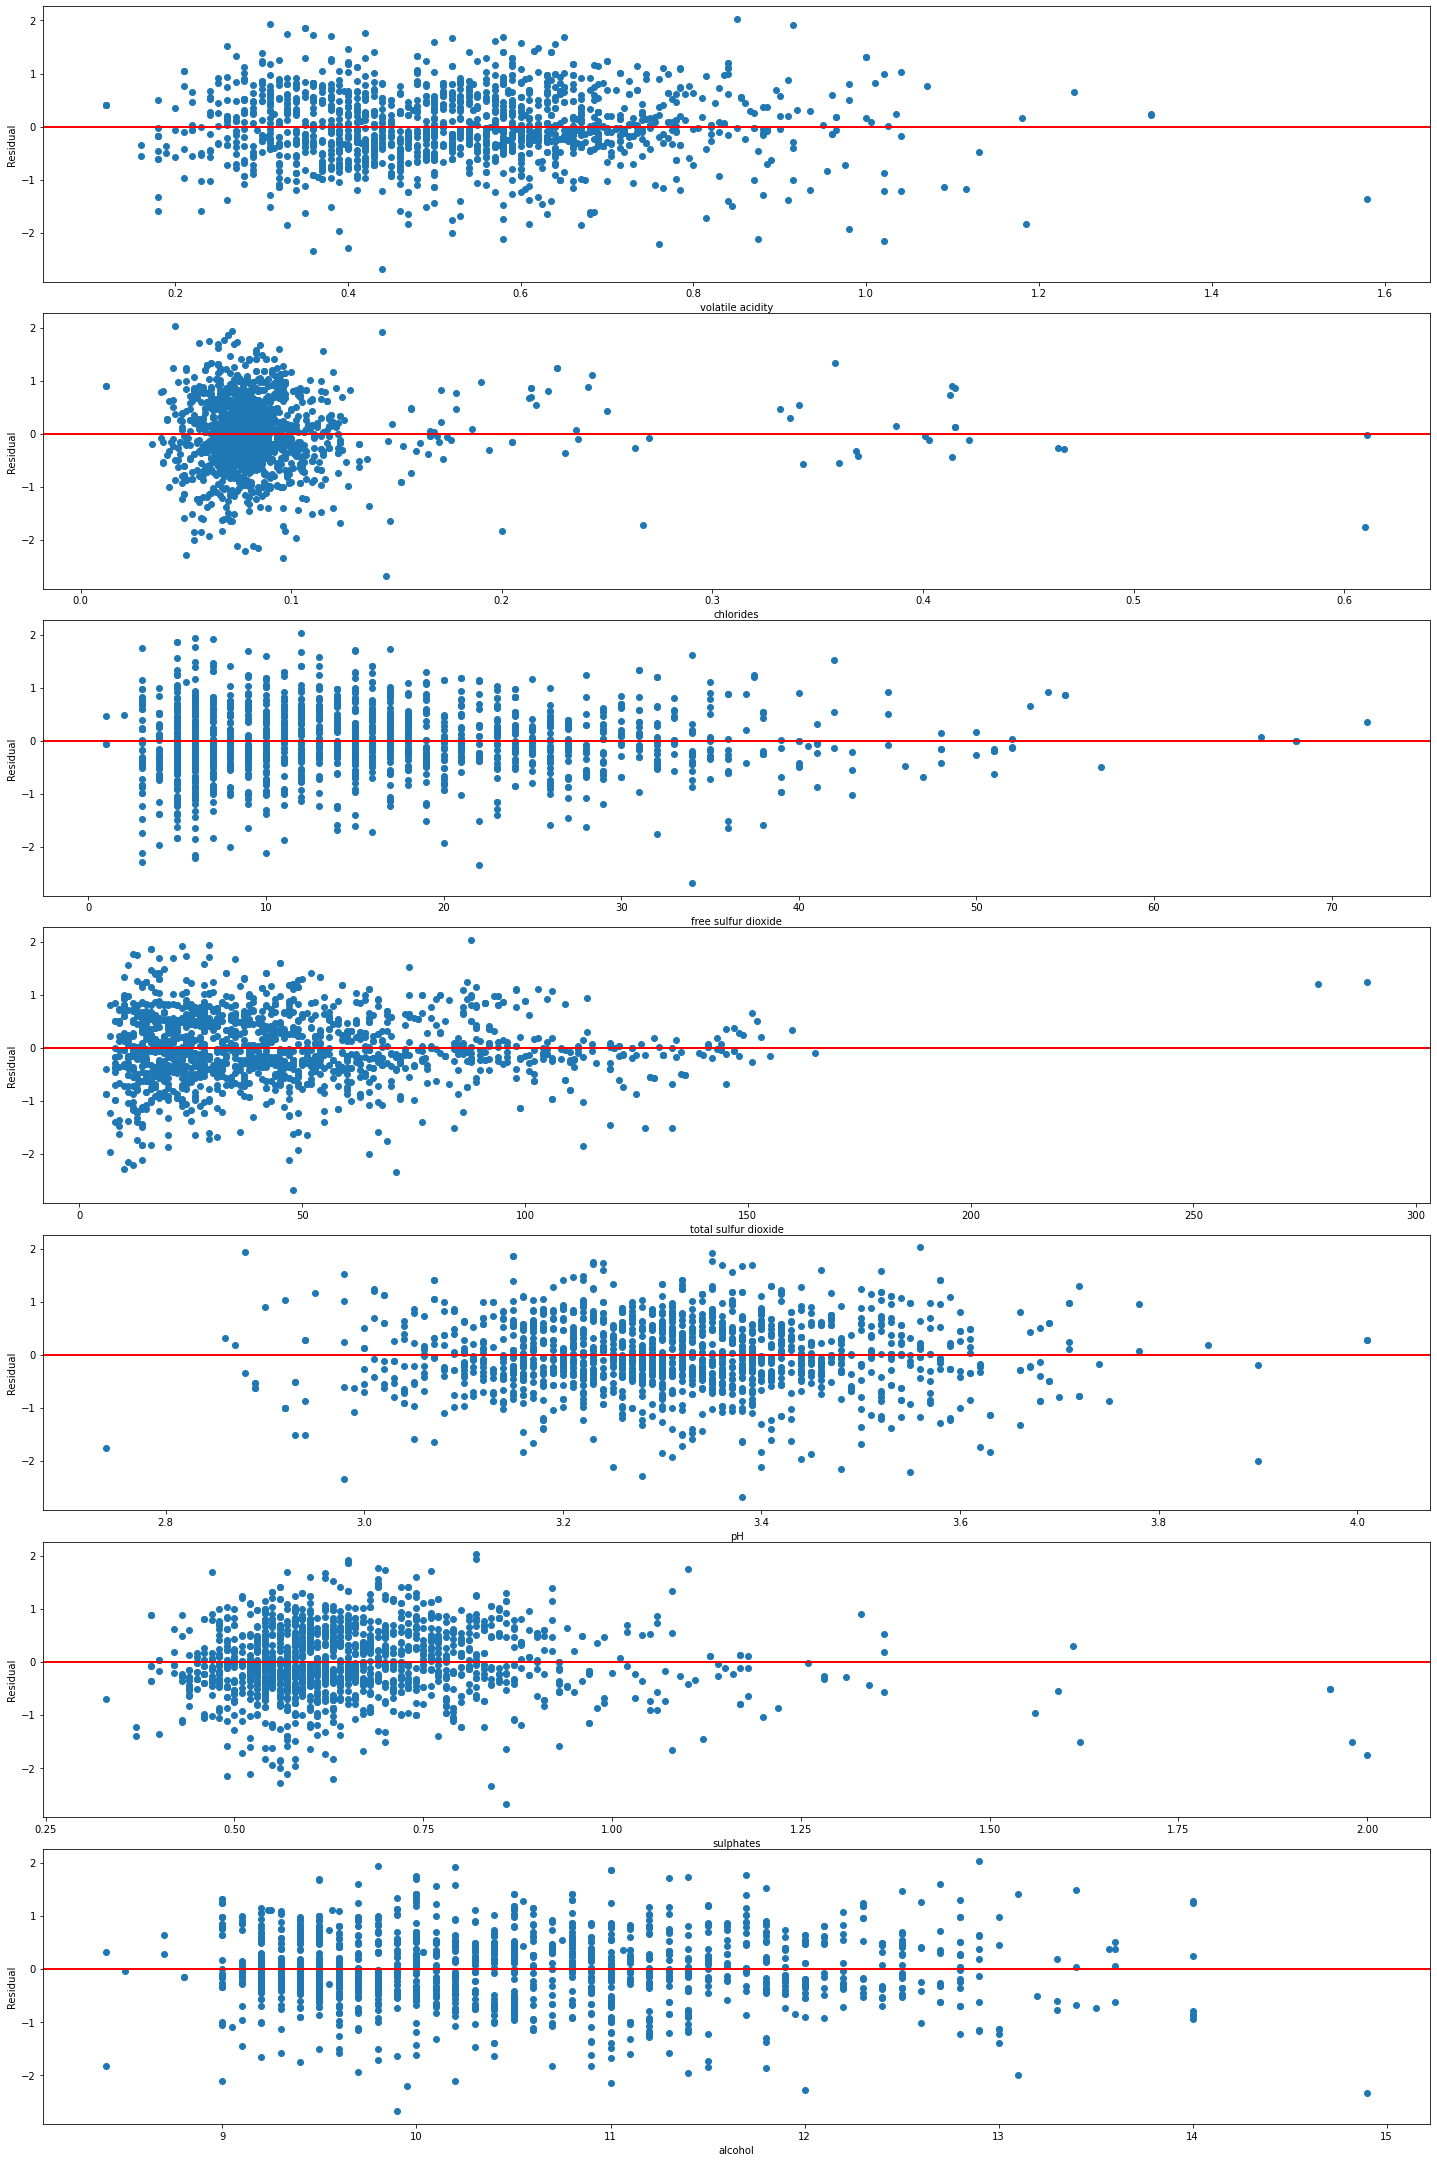

In [29]:
# (12) M1, M2, M3 모델의 잔차는 정규분포를 따른다고 볼 수 있는지 각각 기술하시오. 

# M3
y = data['quality'].values
residual3 = []
x=0

for j in range(len(y)):
    residual3.append(y[j]-y_pred[j])

fig, axs = plt.subplots(7,1,figsize=(20,30))
fig.tight_layout()
for i in range(len(variable_3)):
    axs[x].scatter(data[variable_3[i]], residual3)
    axs[x].set_xlabel(variable_3[i])
    axs[x].set_ylabel('Residual')
    axs[x].axhline(y=0, color='r', linewidth=2)
    x += 1